In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()
N=8000

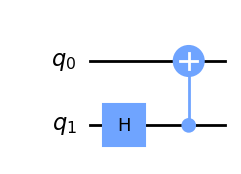

In [2]:
## Creating a gate that creats a bell state
# Create a quantum circuit with two qubits
bell_circuit = QuantumCircuit(2)


bell_circuit.h(1) # Apply a Hadamard gate to the first qubit (creates a Bell state)
bell_circuit.cx(1, 0)  # Apply a CNOT gate to create an entangled state

bc=bell_circuit.to_gate(label="Bell Circuit")
bell_circuit.draw()

In [3]:
## The unitary that changes the basis from (X+Z)/sqrt(2) to standard basis
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
U0=UnitaryGate(
    Operator([[(1-sqrt(2))/sqrt(4-2*sqrt(2)),(1+sqrt(2))/sqrt(4+2*sqrt(2))],
              [1/sqrt(4-2*sqrt(2)),1/sqrt(4+2*sqrt(2))]]), label="U0")
U1=UnitaryGate(
    Operator([[(-1-sqrt(2))/sqrt(4+2*sqrt(2)),(-1+sqrt(2))/sqrt(4-2*sqrt(2))],
              [1/sqrt(4+2*sqrt(2)),1/sqrt(4-2*sqrt(2))]]), label="U1")
## The unitary that changes the basis from (X-Z)/sqrt(2) to standard basis

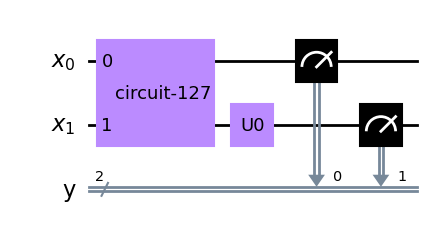

In [4]:
## To calculate P(ab/xy=00) we measure Alice's qubit on Z basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc1 = QuantumCircuit(q,c)
qc1.append(bell_circuit,[q[0], q[1]])

qc1.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc1.measure(q, c)
qc1.draw()



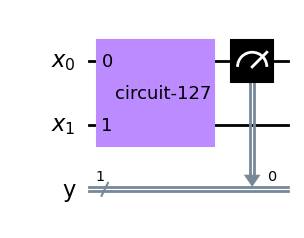

In [5]:
## To calculate P(a/0) we measure Alice's qubit on Z basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc2 = QuantumCircuit(q,c)
qc2.append(bell_circuit,[q[0], q[1]])

##qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc2.measure(q[0], c[0])
qc2.draw()



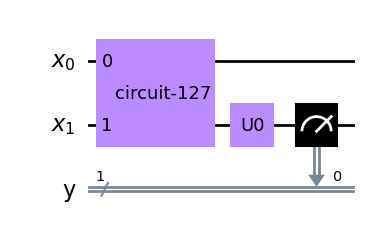

In [6]:
## To calculate P(b/0) we measure Bob's qubit on Z+X/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc3 = QuantumCircuit(q,c)
qc3.append(bell_circuit,[q[0], q[1]])

qc3.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc3.measure(1, 0)
qc3.draw()

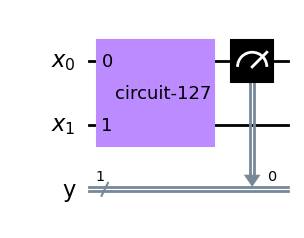

In [7]:
#qc1.draw()
qc2.draw()

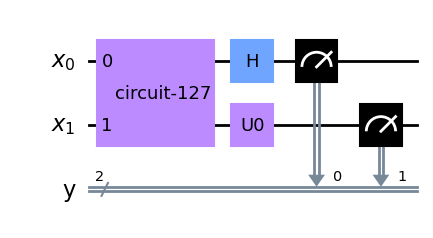

In [8]:
## To calculate P(ab/xy=10) we measure Alice's qubit on X basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc4 = QuantumCircuit(q,c)
qc4.append(bell_circuit,[q[0], q[1]])
qc4.h(0)
qc4.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc4.measure(q, c)
qc4.draw()

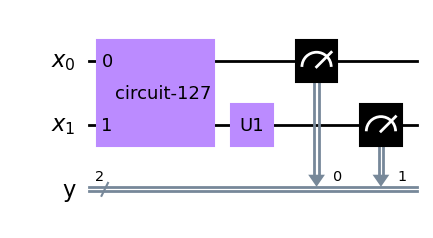

In [9]:
## To calculate P(ab/xy=01) we measure Alice's qubit on Z basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc5 = QuantumCircuit(q,c)
qc5.append(bell_circuit,[q[0], q[1]])

qc5.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc5.measure(q, c)
qc5.draw()

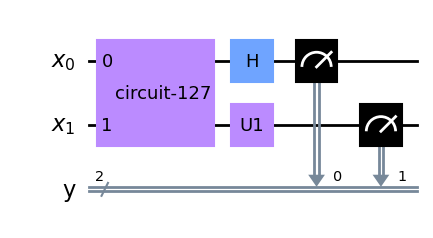

In [10]:
## To calculate P(ab/xy=11) we measure Alice's qubit on X basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc6 = QuantumCircuit(q,c)
qc6.append(bell_circuit,[q[0], q[1]])
qc6.h(0)
qc6.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc6.measure(q, c)
qc6.draw()

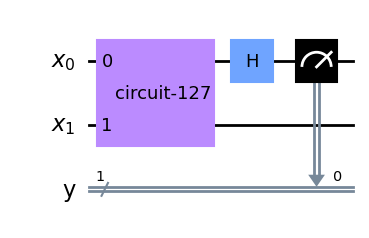

In [11]:
## ## To calculate P(a/1) we measure Alice's qubit on X basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc7 = QuantumCircuit(q,c)
qc7.append(bell_circuit,[q[0], q[1]])
qc7.h(0)
#qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc7.measure(q[0], c)
qc7.draw()

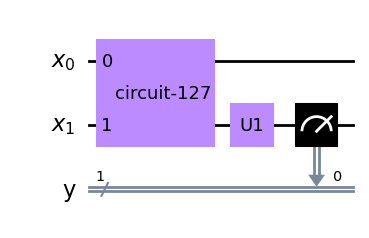

In [12]:
## ## To calculate P(b/1) we measure Bob's qubit on X-Z/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc8 = QuantumCircuit(q,c)
qc8.append(bell_circuit,[q[0], q[1]])

qc8.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc8.measure(q[1], c)
qc8.draw()

In [ ]:
from qiskit import IBMQ, transpile

# Replace TOKEN with your actual API token string
TOKEN = "8add0629e97251c4b38644063e95ebd1565c6e472aab8d34a9e4382330c94f66caf80e5d884d89680f9a5f6b6d1bf0c94f72d6ae1159be935b37e1bb8a3ecec1"


# IBMQ.save_account(TOKEN, overwrite=True) 
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_brisbane')
#############################################################
# Prepare the circuit for the backend
new_qc1 = transpile(qc1, backend=backend)

# Execute the circuit
job1 = backend.run(new_qc1, shots=N)

# Retrieve the results
result1 = job1.result()
counts1 = result1.get_counts(new_qc1)

total_shots = sum(counts1.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P00 = {}

# Calculate the probability for each outcome
for outcome, count in counts1.items():
    probability = count / total_shots
    P00[outcome] = probability

##############################################################################################
# Prepare the circuit for the backend
new_qc2 = transpile(qc2, backend=backend)

# Execute the circuit
job2 = backend.run(new_qc2, shots=N)

# Retrieve the results
result2 = job2.result()
counts2 = result2.get_counts(new_qc2)

total_shots = sum(counts2.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
Pa0 = {}

# Calculate the probability for each outcome
for outcome, count in counts2.items():
    probability = count / total_shots
    Pa0[outcome] = probability

 ########################################################################
# Prepare the circuit for the backend
new_qc3 = transpile(qc3, backend=backend)

# Execute the circuit
job3 = backend.run(new_qc3, shots=N)

# Retrieve the results
result3 = job3.result()
counts3 = result3.get_counts(new_qc3)

total_shots = sum(counts3.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
Pb0 = {}

# Calculate the probability for each outcome
for outcome, count in counts3.items():
    probability = count / total_shots
    Pb0[outcome] = probability
Pb0
 ########################################################################
# Prepare the circuit for the backend
new_qc4 = transpile(qc4, backend=backend)

# Execute the circuit
job4 = backend.run(new_qc4, shots=N)

# Retrieve the results
result4 = job4.result()
counts4 = result4.get_counts(new_qc4)

total_shots = sum(counts4.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P10 = {}

# Calculate the probability for each outcome
for outcome, count in counts4.items():
    probability = count / total_shots
    P10[outcome] = probability
P10
 ########################################################################
# Prepare the circuit for the backend
new_qc5 = transpile(qc5, backend=backend)

# Execute the circuit
job5 = backend.run(new_qc5, shots=N)

# Retrieve the results
result5 = job5.result()
counts5 = result5.get_counts(new_qc5)

total_shots = sum(counts5.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P01 = {}

# Calculate the probability for each outcome
for outcome, count in counts5.items():
    probability = count / total_shots
    P01[outcome] = probability
P01
 ########################################################################
# Prepare the circuit for the backend
new_qc6 = transpile(qc6, backend=backend)

# Execute the circuit
job6 = backend.run(new_qc6, shots=N)

# Retrieve the results
result6 = job6.result()
counts6 = result6.get_counts(new_qc6)

total_shots = sum(counts6.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P11 = {}

# Calculate the probability for each outcome
for outcome, count in counts6.items():
    probability = count / total_shots
    P11[outcome] = probability
P11

 ########################################################################
# Prepare the circuit for the backend
new_qc7 = transpile(qc7, backend=backend)

# Execute the circuit
job7 = backend.run(new_qc7, shots=N)

# Retrieve the results
result7 = job7.result()
counts7 = result7.get_counts(new_qc7)

total_shots = sum(counts7.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
Pa1 = {}

# Calculate the probability for each outcome
for outcome, count in counts7.items():
    probability = count / total_shots
    Pa1[outcome] = probability
Pa1
 ########################################################################
# Prepare the circuit for the backend
new_qc8 = transpile(qc8, backend=backend)

# Execute the circuit
job8 = backend.run(new_qc8, shots=N)

# Retrieve the results
result8 = job8.result()
counts8 = result8.get_counts(new_qc8)

total_shots = sum(counts8.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
Pb1 = {}

# Calculate the probability for each outcome
for outcome, count in counts8.items():
    probability = count / total_shots
    Pb1[outcome] = probability
Pb1

/tmp/ipykernel_128/2878149441.py:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [1]:
job8.status()

Traceback (most recent call last):
  Cell In[1], line 1
    job1.status()
NameError: name 'job1' is not defined

Use %tb to get the full traceback.


In [1]:
##ep_ax = |P(a=1/xy)-P(a=1/xy')|
ep_a0=[]
ep_a0.append(abs(P00['01']+P00['11'] - (P01['01']+P01['11']))) # |P(a=1/00) - P(a=1/01)|
ep_a1=[]
ep_a1.append(abs(P10['01']+P10['11'] - (P11['01']+P11['11']))) # |P(a=1/10) - P(a=1/11)|

##ep_by = P(b=1/xy)-P(b=1/x'y)
ep_b0=[]
ep_b0.append(abs(P00['10']+P00['11'] - (P10['10']+P10['11']))) # |P(b=1/00) - P(b=1/10)|
ep_b1=[]
ep_b1.append(abs(P01['10']+P01['11'] - (P11['10']+P11['11']))) # |P(b=1/01) - P(b=1/11)|

print("ep_a0 = |P(a=1/00) - P(a=1/01)|:", ep_a0)
print("ep_a1 = |P(a=1/10) - P(a=1/11)|:", ep_a1)
print("ep_b0 = |P(b=1/00) - P(b=1/10)|:", ep_b0)
print("ep_b1 = |P(b=1/01) - P(b=1/11)|:", ep_b1)

Traceback (most recent call last):
  Cell In[1], line 3
    ep_a0.append(abs(P00['01']+P00['11'] - (P01['01']+P01['11']))) # |P(a=1/00) - P(a=1/01)|
NameError: name 'P00' is not defined

Use %tb to get the full traceback.


In [ ]:
abs(P00['01']+P00['11'] - (P01['01']+P01['11'])))
print("ep_a0 = |P(a=1/00) - P(a=1/01)|:", ep_a0)


In [ ]:
##ep_noise statistical noise
#ep_a0_snoise=[]
#ep_a1_snoise=[]
#ep_b0_snoise=[]
#ep_b1_snoise=[]

ep_a0_snoise.append(abs(0.5 - Pa0['0']))
ep_a1_snoise.append(abs(0.5 - Pa1['0']))
ep_b0_snoise.append(abs(0.5 - Pb0['0'])) 
ep_b1_snoise.append(abs(0.5 - Pb1['0'])) 

print("ep_a0_snoise = |P(a=0/0) - 1/2|:", ep_a0_snoise)
print("ep_a1_snoise = |P(a=0/1) - 1/2|:", ep_a1_snoise)
print("ep_b0_snoise = |P(b=0/0) - 1/2|:", ep_b0_snoise)
print("ep_b1_snoise = |P(b=0/1) - 1/2|:", ep_b1_snoise)

Traceback (most recent call last):
  Cell In[29], line 2
    result1 = job1.result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:279 in result
    raise IBMQJobInvalidStateError('Unable to retrieve result for job {}. '
IBMQJobInvalidStateError: 'Unable to retrieve result for job cpebcntja3gg00812kh0. Job was cancelled.'

Use %tb to get the full traceback.
